In [1]:
#famous iris flower dataset
#classifying species of flower based on some attributes
#dataset has 50 examples from the three species
#we'll first use the method one vs all (sometimes called one vs rest)

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
X = iris.data
Y = iris.target

In [7]:
#set features and target

In [9]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [11]:
iris_target = DataFrame(Y,columns=['Species'])

In [14]:
#use split/apply to give the real names
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [15]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [16]:
iris_target.tail()

Species
145  Virginica
146  Virginica
147  Virginica
148  Virginica
149  Virginica

In [17]:
iris = pd.concat([iris_data,iris_target],axis=1)
#concat these, and since joining along columns set axis to 1

In [18]:
#quick vizualization of the information

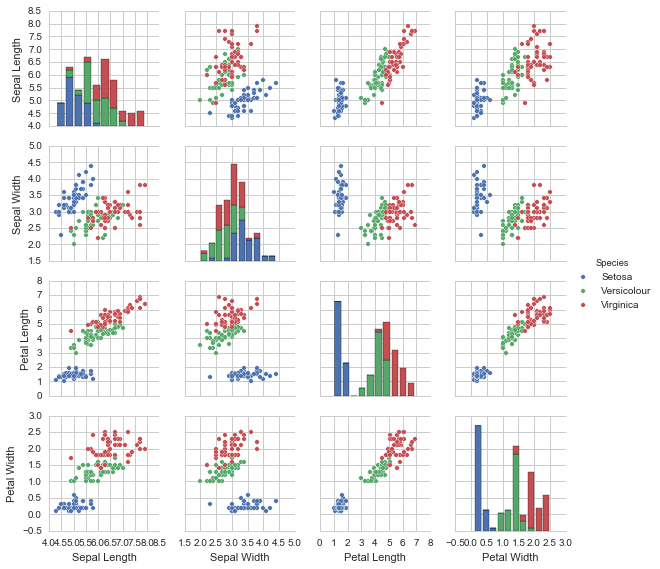

In [19]:
sns.pairplot(iris,hue='Species',size=2)

In [20]:
#nice overview of how these species relate to each other by different factors like sepal width etc.

In [21]:
#we can see the groupings. Setosa looks pretty distinct from the other species

In [22]:
#the challenge looks like it will be seperating versicolour and virginica

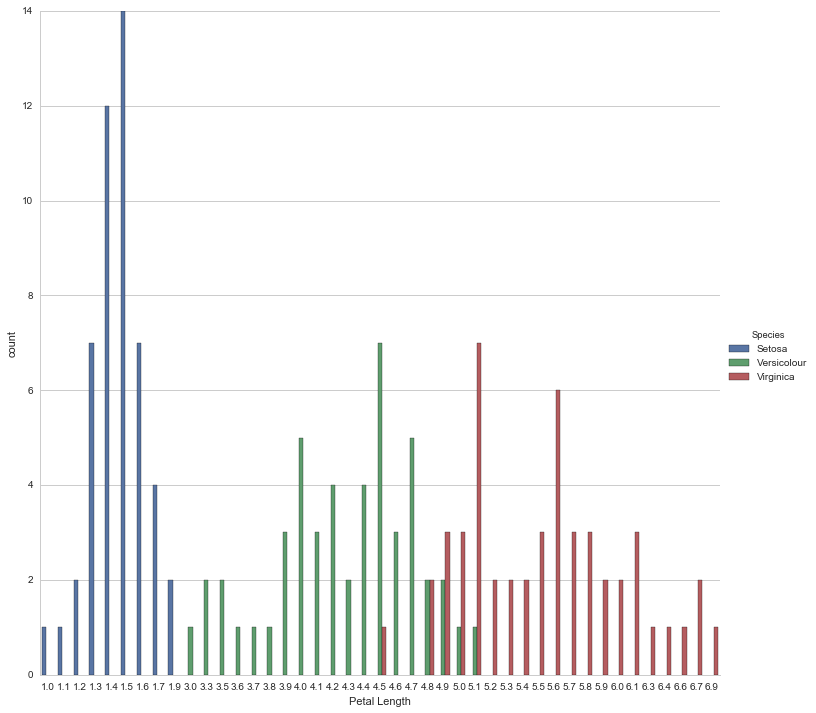

In [26]:
sns.factorplot('Petal Length',data=iris,hue='Species',kind='count',size = 10)

In [27]:
#now lets perform a multi-class classification using logistic regression techniques

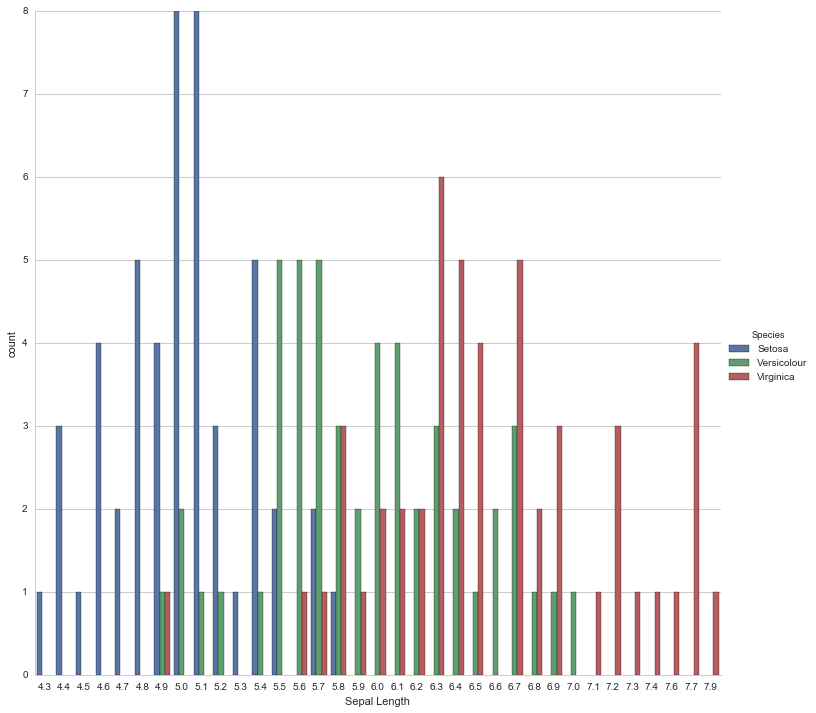

In [28]:
sns.factorplot('Sepal Length',data=iris,hue='Species',kind='count',size = 10)

In [29]:
#appears to be more overlap in sepal length for example

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [31]:
logreg = LogisticRegression()

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)
#random state is the type of randomization used


In [33]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
#now we've trained the model with the training set, now lets look at accuracy

In [35]:
from sklearn import metrics

In [36]:
Y_pred = logreg.predict(X_test)

In [37]:
print metrics.accuracy_score(Y_test,Y_pred)

0.933333333333


In [38]:
#looks like model has about 93% accuracy. Should we trust this level of accuracy?

In [39]:
#from the pairplot this does look believable considering there appears to be pretty string differences between classifications

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=3)


In [41]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
Y_pred = logreg.predict(X_test)
print metrics.accuracy_score(Y_test,Y_pred)

1.0


In [43]:
#with only .2 of the test size reserved for testing, the accuracy goes to 1.0 ie you're using more data for training 

In [44]:
#this could strengthen the model but also could cause overfitting

In [45]:
#Let's look at K-Nearest Neighbors 

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [56]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [57]:
Y_pred = knn.predict(X_test)

In [58]:
print metrics.accuracy_score(Y_test,Y_pred)

0.95


In [59]:
knn = KNeighborsClassifier(n_neighbors=1)

In [60]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [61]:
Y_pred = knn.predict(X_test)

In [63]:
print metrics.accuracy_score(Y_test,Y_pred)

0.966666666667


In [64]:
#using k = 1 gives us a little more accuracy
#how to know what the best k is to use?
#since our dataset is small we can cycle through k values to find the most accurate model

In [65]:
k_range = range(1,21)
accuracy = []
#repeat the above process for all k-values

In [66]:
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

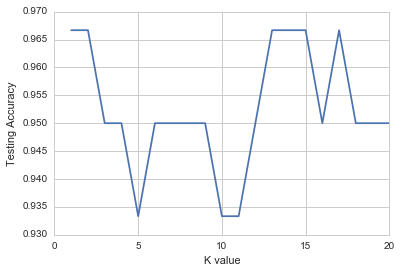

In [67]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')

In [68]:
#looks like we get this peak at k = 1 and then up and down varying on what the data looks like

In [69]:
#can't always do this with the data so there are other methods if you have really large datasets